# Identify Fraud from Enron Email

## Issues to Look Into

Getting all features and labels in the right format for machine learning.  Currently throwing errors.

## New Features

The following features may be useful:

- fraction_from_this_person_to_poi
- fraction_from_poi_to_this_person
- bonus/salary
- exercised_stock_options / total_stock_value

## Important Features

The following features showed clear boundaries that may be useful for the classifier:
1. director_fees: uniformly non-poi
2. restricted_stock_deferred: uniformly non-poi
3. fract_to_poi: uniformly non-poi .15 and under
4. fract_from_poi: uniformly non-poi around .02 and under
5. exercised_stock_options: 
  1. Uniformly non-poi under \$300,000
  2. Uniformly poi over around \$20,000,000
6. expenses: uniformly non-poi under \$10,000
7. total_stock_value:
  1. Small pocket of pois over around $20,000,000

## Features to Definitely Remove

1. loan_advances: there are only 3 data points, the rest are missing


## Todo

### Report

Congratulations! You completed the analysis and your evaluation metrics are looking good.  The next thing you need to do is tie up a couple loose ends and write the report:

1. Use pipeline for your PCA
2. Wanted to create modify_features.py but it looks like you need to do everything in poi.py
  1. Add all necessary scripts / functions to poi.py
3. Answer questions in report
4. Research DecisionTreeClassifier
5. Review answers at a separate time and submit


### Outliers?
- Create an outlier removal function, similar to what you did to remove regression outliers.
 - Create list of tuples of regression
 - Remove 10%
- Remove outliers from all variables of interest

In [ ]:
def create_features(data_dict):
    for key, value in data_dict.items():
        from_person_to_poi = value['from_this_person_to_poi']
        from_messages = value['from_messages']
        from_poi_to_this_person = value['from_poi_to_this_person']
        to_messages = value['to_messages']
        salary = value['salary']
        bonus = value['bonus']
        exercised_stock_options = value['exercised_stock_options']
        total_stock_value = value['total_stock_value']
        
        if from_person_to_poi != 'NaN' and from_messages != 'NaN':
            value['fract_to_poi'] = float(from_person_to_poi)/from_messages
        else:
            value['fract_to_poi'] = 'NaN'
        if from_poi_to_this_person != 'NaN' and to_messages != 'NaN':
            value['fract_from_poi'] = float(from_poi_to_this_person)/to_messages
        else:
            value['fract_from_poi'] = 'NaN'
        if salary != 'NaN' and bonus != 'NaN':
            value['salary_over_bonus'] = float(salary)/bonus
        else:
            value['salary_over_bonus'] = 'NaN'
        if exercised_stock_options != 'NaN' and total_stock_value != 'NaN' and total_stock_value != 0:
            value['exer_stock_opts_over_tot'] = float(exercised_stock_options)/total_stock_value
        else:
            value['exer_stock_opts_over_tot'] = 'NaN'
    return data_dict

## Scaling Features

In order to scale the features you're going to need to deal with the dictionary and list of list formats.  You'll probably need to create some sort of numpy array or pandas dataframe out of the dictionary.  Then you can probably run a MinMaxScaler on each column.  Finally, you'll need to place those values back into the dictionary.  This looks like a job for tomorrow.

In [ ]:
def scale_features(data_dict):
    import pandas as pd
    
    
    # Create dataframe from dictionary
    data_df = pd.DataFrame.from_dict(data_dict, orient='index')
    data_df.replace('NaN', np.nan, inplace = True)
    
    # Scale using manual scaler to ignore non-numerical values
    scaled_df = data_df.apply(manual_MinMaxScaler)
    
    # Transform using PCA
    #transformed_df = scaled_df.apply(transform_PCA)
    
    # Return NaN values to original form and create .csv to check
    scaled_df.replace(np.nan, 'NaN', inplace = True)
    scaled_df.to_csv('scaled_enron_data.csv')
    return pd.DataFrame.to_dict(scaled_df, orient='index')
    
def manual_MinMaxScaler(df):
    if df.name != 'name' and df.name != 'email_address' and df.name != 'poi':
        min_val = df.min()
        max_val = df.max()
        return (df-min_val)/(max_val-min_val)
    else:
        return df
'''
def transform_PCA(data_df):
    # Need to transform data using pca
    # input = np array 
    # output = np array of formatted features
    # Need to 
    data_np = data_df
'''

# Ideas

- Use selectkbest
- Plot it
- Try to come up with new features based on what you see
- Use shared with poi somehow

Training the classifier
Training time: 9.429s


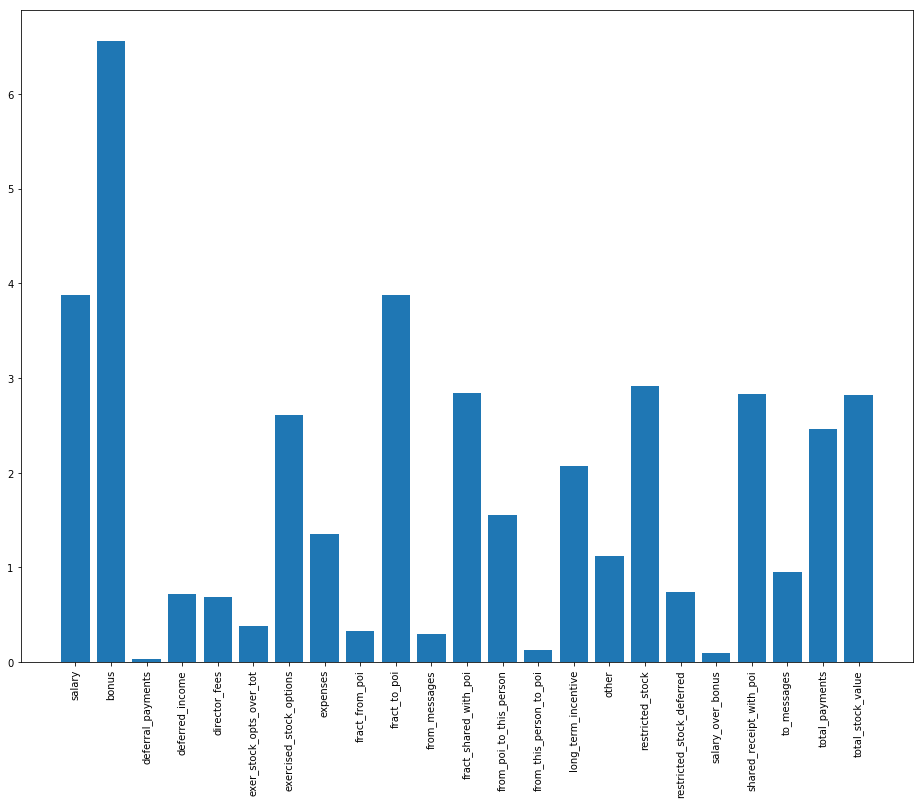

Pipeline(steps=[('skb', SelectKBest(k=16, score_func=<function f_classif at 0x10bf806e0>)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=5, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=0.3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Explained variance ratio: [ 0.33967273  0.28988271  0.13972605  0.07159809  0.05542013]
             precision    recall  f1-score   support

        0.0       0.93      0.68      0.79        38
        1.0       0.20      0.60      0.30         5

avg / total       0.84      0.67      0.73        43



In [35]:
# final_project/poi_id.py

#!/usr/bin/python

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
#sys.path.append("../tools/")

#from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data

### Task 0: Define functions I'll use since everything is in one script 

def create_features(data_dict):
    for key, value in data_dict.items():
        from_person_to_poi = value['from_this_person_to_poi']
        from_messages = value['from_messages']
        from_poi_to_this_person = value['from_poi_to_this_person']
        to_messages = value['to_messages']
        salary = value['salary']
        bonus = value['bonus']
        exercised_stock_options = value['exercised_stock_options']
        total_stock_value = value['total_stock_value']
        shared_receipt_with_poi = value['shared_receipt_with_poi']
        
        if from_person_to_poi != 'NaN' and from_messages != 'NaN':
            value['fract_to_poi'] = float(from_person_to_poi)/from_messages
        else:
            value['fract_to_poi'] = 'NaN'
        if from_poi_to_this_person != 'NaN' and to_messages != 'NaN':
            value['fract_from_poi'] = float(from_poi_to_this_person)/to_messages
        else:
            value['fract_from_poi'] = 'NaN'
        if salary != 'NaN' and bonus != 'NaN':
            value['salary_over_bonus'] = float(salary)/bonus
        else:
            value['salary_over_bonus'] = 'NaN'
        if exercised_stock_options != 'NaN' and total_stock_value != 'NaN' and total_stock_value != 0:
            value['exer_stock_opts_over_tot'] = float(exercised_stock_options)/total_stock_value
        else:
            value['exer_stock_opts_over_tot'] = 'NaN'
        if shared_receipt_with_poi != 'NaN' and to_messages != 'NaN':
            value['fract_shared_with_poi'] = float(shared_receipt_with_poi)/to_messages
    return data_dict

def scale_features(data_dict):
    import pandas as pd
    
    
    # Create dataframe from dictionary
    data_df = pd.DataFrame.from_dict(data_dict, orient='index')
    data_df.replace('NaN', np.nan, inplace = True)
    
    # Scale using manual scaler to ignore non-numerical values
    scaled_df = data_df.apply(manual_MinMaxScaler)
    
    # Return NaN values to original form and create .csv to check
    scaled_df.replace(np.nan, 'NaN', inplace = True)
    scaled_df.to_csv('scaled_enron_data.csv')
    return pd.DataFrame.to_dict(scaled_df, orient='index')
    
def manual_MinMaxScaler(df):
    if df.name != 'name' and df.name != 'email_address' and df.name != 'poi':
        min_val = df.min()
        max_val = df.max()
        return (df-min_val)/(max_val-min_val)
    else:
        return df

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 
                 'exer_stock_opts_over_tot', 'exercised_stock_options', 'expenses', 
                 'fract_from_poi', 'fract_to_poi', 'from_messages', 'fract_shared_with_poi',
                 'from_poi_to_this_person', 'from_this_person_to_poi', 
                 'long_term_incentive', 'other', 'restricted_stock', 
                 'restricted_stock_deferred', 'salary_over_bonus', 'shared_receipt_with_poi', 
                 'to_messages', 'total_payments', 'total_stock_value']

'''
features_list = ['poi', 'fract_from_poi', 'fract_to_poi', 'director_fees',
                 'restricted_stock_deferred', 'expenses', 'restricted_stock',
                 'exer_stock_opts_over_tot', 'salary_over_bonus', 'shared_receipt_with_poi']

'''
'''
features_list = ['poi', 'fract_from_poi', 'fract_to_poi', 'director_fees',
                 'restricted_stock_deferred', 'exercised_stock_options', 'expenses']
'''

### Load the dictionary containing the dataset
dataset_path = "../udacity/p5-intro-to-machine-learning/ud120-projects-master/final_project/final_project_dataset.pkl"
with open(dataset_path, "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
data_dict.pop('TOTAL')
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')
data_dict.pop('LOCKHART EUGENE E')

### Task 3: Create new feature(s)
new_data_dict = create_features(data_dict)

### Scale features for use in PCA
new_data_dict = scale_features(new_data_dict)

### Store to my_dataset for easy export below.
my_dataset = new_data_dict



### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from time import time






### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# Unsupervised feature extraction / dimensionality reduction
n_components = 12

skb = SelectKBest(f_classif, k = 16)

# Best classifiers
clf_DT = DecisionTreeClassifier(random_state=42)
clf_AB = AdaBoostClassifier()
clf_SVM = SVC()

# PCA
pca = PCA(random_state = 42)

# Pipeline
steps = [('skb', skb),
         ('PCA', pca),
         ('clf', clf_SVM)]
pipe = Pipeline(steps)

# GridSearchCV
params = {"PCA__n_components": [5],
         "clf__C": [.3],
         "clf__gamma": [.1, .2, .3, .4, .5, .6, .7, .8, .9],
         "clf__class_weight": ["balanced"]}
cv = StratifiedShuffleSplit(100, random_state = 42)
gs = GridSearchCV(pipe, 
                  param_grid = params,
                  cv = cv,
                  scoring = 'f1_weighted')

# Train Classifier
print "Training the classifier"
t0 = time()
gs.fit(features_train, labels_train)
clf = gs.best_estimator_

print "Training time: %0.3fs" % (time() - t0)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(gs.best_estimator_.named_steps['skb'].pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.rcParams['figure.figsize'] = (16, 12)
plt.bar(range(len(features_list[1:])), scores)
plt.xticks(range(len(features_list[1:])), features_list[1:], rotation='vertical')
plt.show()

pred = gs.predict(features_test)
print clf
print "Explained variance ratio:", gs.best_estimator_.named_steps['PCA'].explained_variance_ratio_

print classification_report(labels_test, pred)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

In [43]:
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
#sys.path.append("../tools/")
#from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

my_path = '../udacity/p5-intro-to-machine-learning/ud120-projects-master/final_project/'
        
CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(my_path + CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(my_path + DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(my_path + FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(my_path + CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(my_path + DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(my_path + FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
	Accuracy: 0.85707	Precision: 0.38197	Recall: 0.11650	F1: 0.17854	F2: 0.13531
	Total predictions: 15000	True positives:  233	False positives:  377	False negatives: 1767	True negatives: 12623



In [ ]:
# final_project/poi_id.py

#!/usr/bin/python

import sys
import pickle
import numpy as np
from pprint import pprint
#sys.path.append("../tools/")

#from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary', 'fract_to_poi', 'fract_from_poi', 
                 'director_fees', 'restricted_stock_deferred', 
                 'exercised_stock_options', 'expenses', 'total_stock_value']
### Load the dictionary containing the dataset
dataset_path = "../udacity/p5-intro-to-machine-learning/ud120-projects-master/final_project/final_project_dataset.pkl"
with open(dataset_path, "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
data_dict.pop('TOTAL')
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')
data_dict.pop('LOCKHART EUGENE E')

### Task 3: Create new feature(s)



### Scale features for use in PCA


### Store to my_dataset for easy export below.
my_dataset = data_dict



### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from time import time






### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# Unsupervised feature extraction / dimensionality reduction

clf = 
print "Training the classifier"
t0 = time()
clf.fit(features_train, labels_train)
clf = gs.best_estimator_

print "Training time: %0.3fs" % (time() - t0)
pred = clf.predict(features_test)
print clf
print "Explained variance ratio:", gs.best_estimator_.named_steps['PCA'].explained_variance_ratio_
print "Feature importances:", gs.best_estimator_.named_steps['clf'].feature_importances_
print classification_report(labels_test, pred)

#print "Number of Components:", n_components
#print "Explained Variance Ratio:", pca.explained_variance_ratio_[:4]

#features_train_pca = pca.transform(features_train)
#features_test_pca = pca.transform(features_test)

# Train a classification model using the new PCA


#from sklearn.model_selection import GridSearchCV
#from time import time

#clf = GridSearchCV(pipe, scoring = 'f1_weighted')

'''
skb = SelectKBest(f_classif)
pca = PCA()
clf_AB = AdaBoostClassifier()
clf_DT = DecisionTreeClassifier()

pipe = Pipeline(steps)

param_grid = {
         'min_samples_leaf': [1, 2, 4, 8],
        'random_state': [42]
          }

pca_params = {"PCA__n_components": [8],
             "PCA__whiten": [True],
             "SKB__k": [8, 10]}

steps = [('SKB', skb),
         ('PCA', pca),
         ('clf', clf_DT)]

clf = GridSearchCV(pipe,
                  pca_params,
                  verbose = 0,
                  scoring = 'f1_weighted')
'''


'''
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_
'''

'''
print "Fitting the classifier to the training set"
t0 = time()
param_grid = {
         'min_samples_split': [2],
        'random_state': [42]
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
'''
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

## Create CSV for Exploratory Data Analysis in R

The following code will convert the data dictionary into a csv for EDA in R.  It's a lot easier to manipulate and explore the data visually in R.  After getting a better feel for the data, I will be in a better position to eliminate outliers and analyse possible new features.

In [ ]:
import unicodecsv

with open('enron_data.csv', 'wb') as csvfile:
    fieldnames = ['name', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 
                  'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 
                  'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 
                  'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 
                  'email_address', 'from_poi_to_this_person']
    writer = unicodecsv.DictWriter(csvfile, fieldnames = fieldnames)
    
    writer.writeheader()
    for key, value in data_dict.items():
        row = {'name': key}
        row.update(value)
        writer.writerow(row)

## Classifier Results Log

## Features used:

features_list = ['poi', 'fract_from_poi', 'fract_to_poi', 'director_fees',
                 'restricted_stock_deferred', 'exercised_stock_options', 'expenses']
                 
### SVM

<img src = 'screenshots/Screen Shot 2017-07-06 at 2.24.08 PM.png'>

<img src = 'screenshots/Screen Shot 2017-07-06 at 5.16.53 PM.png'>

<img src = 'screenshots/Screen Shot 2017-07-06 at 5.18.37 PM.png'>

<img src = 'screenshots/'>

<img src = 'screenshots/'>

### DecisionTree

<img src = 'screenshots/Screen Shot 2017-07-06 at 2.28.23 PM.png'>

<img src = 'screenshots/Screen Shot 2017-07-06 at 2.30.04 PM.png'>

### KNearest Neighbors

<img src = 'screenshots/Screen Shot 2017-06-21 at 5.57.06 PM.png'>






In [1]:
# tools/feature_format.py

#!/usr/bin/python

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features






In [84]:
#!/usr/bin/python

import sys
import pickle
import numpy as np
#sys.path.append("../tools/")

#from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data

### Task 0: Define functions I'll use since everything is in one script 

def create_features(data_dict):
    for key, value in data_dict.items():
        from_person_to_poi = value['from_this_person_to_poi']
        from_messages = value['from_messages']
        from_poi_to_this_person = value['from_poi_to_this_person']
        to_messages = value['to_messages']
        salary = value['salary']
        bonus = value['bonus']
        exercised_stock_options = value['exercised_stock_options']
        total_stock_value = value['total_stock_value']
        
        if from_person_to_poi != 'NaN' and from_messages != 'NaN':
            value['fract_to_poi'] = float(from_person_to_poi)/from_messages
        else:
            value['fract_to_poi'] = 'NaN'
        if from_poi_to_this_person != 'NaN' and to_messages != 'NaN':
            value['fract_from_poi'] = float(from_poi_to_this_person)/to_messages
        else:
            value['fract_from_poi'] = 'NaN'
        if salary != 'NaN' and bonus != 'NaN':
            value['salary_over_bonus'] = float(salary)/bonus
        else:
            value['salary_over_bonus'] = 'NaN'
        if exercised_stock_options != 'NaN' and total_stock_value != 'NaN' and total_stock_value != 0:
            value['exer_stock_opts_over_tot'] = float(exercised_stock_options)/total_stock_value
        else:
            value['exer_stock_opts_over_tot'] = 'NaN'
    return data_dict

def scale_features(data_dict):
    import pandas as pd
    
    
    # Create dataframe from dictionary
    data_df = pd.DataFrame.from_dict(data_dict, orient='index')
    data_df.replace('NaN', np.nan, inplace = True)
    
    # Scale using manual scaler to ignore non-numerical values
    scaled_df = data_df.apply(manual_MinMaxScaler)
    
    # Return NaN values to original form and create .csv to check
    scaled_df.replace(np.nan, 'NaN', inplace = True)
    scaled_df.to_csv('scaled_enron_data.csv')
    return pd.DataFrame.to_dict(scaled_df, orient='index')
    
def manual_MinMaxScaler(df):
    if df.name != 'name' and df.name != 'email_address' and df.name != 'poi':
        min_val = df.min()
        max_val = df.max()
        return (df-min_val)/(max_val-min_val)
    else:
        return df

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".


features_list = ['poi', 'salary', 'bonus', 'fract_from_poi', 'fract_to_poi', 'director_fees',
                 'restricted_stock_deferred', 'exercised_stock_options', 'expenses',
                'total_stock_value']


### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
data_dict.pop('TOTAL')
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')
data_dict.pop('LOCKHART EUGENE E')

### Task 3: Create new feature(s)
new_data_dict = create_features(data_dict)

#### Scale features for use in PCA
new_data_dict = scale_features(new_data_dict)

### Store to my_dataset for easy export below.
my_dataset = new_data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score
from time import time






### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
'''
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
'''

#clf = SVC(class_weight = 'balanced', random_state = 42)
clf = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)

from sklearn.model_selection import StratifiedShuffleSplit
features_np = np.array(features)
labels_np = np.array(labels)
sss = StratifiedShuffleSplit(n_splits = 10, test_size = .5, random_state = 42)
sss.get_n_splits(features_np, labels_np)
accuracy_scores = []

print "Training the classifier"
for train_index, test_index in sss.split(features_np, labels_np):
    features_train, features_test = features_np[train_index], features_np[test_index]
    labels_train, labels_test = labels_np[train_index], labels_np[test_index]
    t0 = time()
    clf.fit(features_train, labels_train)
    print "Training time: %0.3fs" % (time() - t0)
    pred = clf.predict(features_test)
    print classification_report(labels_test, pred)
    accuracy_scores.append(accuracy_score(pred, labels_test))

print np.mean(accuracy_scores)

# Extract best classifier

print clf

#print "Explained variance ratio:", gs.best_estimator_.named_steps['PCA'].explained_variance_ratio_



### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

Training the classifier
Training time: 0.015s
             precision    recall  f1-score   support

        0.0       0.88      0.92      0.90        62
        1.0       0.17      0.11      0.13         9

avg / total       0.79      0.82      0.80        71

Training time: 0.001s
             precision    recall  f1-score   support

        0.0       0.89      0.92      0.90        62
        1.0       0.29      0.22      0.25         9

avg / total       0.81      0.83      0.82        71

Training time: 0.001s
             precision    recall  f1-score   support

        0.0       0.88      0.92      0.90        62
        1.0       0.17      0.11      0.13         9

avg / total       0.79      0.82      0.80        71

Training time: 0.001s
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94        62
        1.0       0.60      0.33      0.43         9

avg / total       0.87      0.89      0.87        71

Training time: 0.001s
      

In [85]:
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
#sys.path.append("../tools/")
#from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

my_path = '../udacity/p5-intro-to-machine-learning/ud120-projects-master/final_project/'
        
CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(my_path + CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(my_path + DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(my_path + FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(my_path + CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(my_path + DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(my_path + FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
	Accuracy: 0.83947	Precision: 0.38448	Recall: 0.33950	F1: 0.36059	F2: 0.34763
	Total predictions: 15000	True positives:  679	False positives: 1087	False negatives: 1321	True negatives: 11913

